# DETECCIÓN DE TRANSACCIONES FRAUDULENTAS CON TARJETAS BANCARIAS USANDO MACHINE LEARNING 

## `Masters Degree in Data Science`

# <font color='orange'>CUNEF</font>

## ASIGNACIÓN TFM 

 ### Ignacio González García-Valdés

#### -------------------

#### Target Variable 

The target variable for this dataset is the following: is_fraud

#### Assignment Objective

It is conceivable that we are dealing with a synthetic dataset designed to mimic a financial institution's card transaction dataset. Based on the available data, the primary goal of this task is to detect fraudulent transactions.

The main objective is to develop a model that can assess the probability of fraud for a given transaction. To achieve this, a thorough analysis of the data is necessary, including profiling, feature engineering, variable selection, and transformation. These steps are essential to gain insights into the underlying patterns and characteristics of fraudulent transactions.

By carefully examining the data and generating appropriate descriptors, we can create a robust model that effectively identifies and predicts the likelihood of fraud. The success of this endeavor relies on meticulous exploration, feature engineering, and comprehensive variable analysis to ensure the model's accuracy and reliability.

#### Notebook Objective

Within this document titled "03_Model," the primary focus will be on the preparation and implementation of the model. This stage involves a series of critical steps aimed at building a reliable and effective model to address the specific task at hand.

Firstly, the selection of an appropriate modeling technique or algorithm will be made, taking into account the nature of the problem and the characteristics of the dataset. This may involve exploring various options such as classification, regression, or clustering algorithms.

Once the model is chosen, it will be trained using the prepared dataset. This involves splitting the data into training and validation sets, applying the selected algorithm, and fine-tuning the model's parameters for optimal performance.

Furthermore, the model's performance will be evaluated using suitable metrics and techniques. This evaluation provides insights into how well the model generalizes to unseen data and helps identify areas for potential improvement.

Throughout the process, it is crucial to maintain a rigorous and iterative approach, continuously assessing and refining the model to achieve the desired results. The document will document the steps taken, decisions made, and outcomes observed, providing a comprehensive record of the model's development.

Ultimately, the purpose of this document is to guide and document the journey from data preparation to model implementation, ensuring a systematic and transparent approach to model development.

#### --------------------

#### Libraries

In [67]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_curve,roc_auc_score, \
                            classification_report, confusion_matrix, \
                            precision_recall_curve, precision_score, \
                            f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
from sklearn.inspection import partial_dependence
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from imblearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

sns.set(rc = {'figure.figsize':(15,8)})

#### Functions

In [83]:
def get_models_score(classifiers, X_train_scaled, Y_train_res):
    for classifier in classifiers:
        classifier.fit(X_train_scaled, Y_train_res)
        y_pred = classifier.predict(X_test_scaled)
        
        print(classifier)
        print("Accuracy: %.7f" % metrics.accuracy_score(Y_test, y_pred))
        print("Precision: %.7f" % metrics.precision_score(Y_test, y_pred))
        print("------------------------")

def get_model_report(Y_test, y_pred):
    print("Classification Report")
    print(classification_report(Y_test, y_pred))
    
def get_confusion_matrix(model, X_test_scaled, Y_test):
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test_scaled, Y_test,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    
def get_roc_curves(Y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='LGBM')
   
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    plt.show()
    
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='LGBM')
    plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

def get_precission_recall_curve(Y_test, y_pred):
    precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
    no_skill = len(Y_test[Y_test==1]) / len(Y_test)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='LGBM')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    
    
    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    no_skill = len(Y_test[Y_test==1]) / len(Y_test)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='LGBM')
    plt.scatter(recall[ix], precision[ix], s=100, marker='o', color='black', label='Best')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    
def analyze_train_test_performance(model, X_train_scaled, Y_train_res, X_test_scaled, Y_test):
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(Y_train_res, y_train_pred)
    test_accuracy = accuracy_score(Y_test, y_test_pred)

    print(f'Training Accuracy: {train_accuracy*100:.5f}%')
    print(f'Test Accuracy: {test_accuracy*100:.5f}%')

    train_sensitivity = recall_score(Y_train_res, y_train_pred)
    test_sensitivity = recall_score(Y_test, y_test_pred)

    print(f'Training Sensitivity: {train_sensitivity*100:.5f}%')
    print(f'Test Sensitivity: {test_sensitivity*100:.5f}%')

    tn_train, fp_train, fn_train, tp_train = confusion_matrix(Y_train_res, y_train_pred).ravel()
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(Y_test, y_test_pred).ravel()

    train_specificity = tn_train / (tn_train + fp_train)
    test_specificity

def calculate_sensitivity_specificity(y_test, y_pred):
   
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    return sensitivity, specificity

def calculate_accuracy_precision(model, X_train_scaled, X_test_scaled, Y_train_res, Y_test):

    model.fit(X_train_scaled, Y_train_res)
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)
    train_accuracy = round(accuracy_score(Y_train_res, train_preds), 5)
    train_precision = round(precision_score(Y_train_res, train_preds), 5)

    test_accuracy = round(accuracy_score(Y_test, test_preds), 5)
    test_precision = round(precision_score(Y_test, test_preds), 5)

    return train_accuracy, train_precision, test_accuracy, test_precision

def calculate_f1_f2_scores(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2.0)
    return f1, f2

#### Parametrisation

In [3]:
csv_path = '../Data/Processed/fraud_dataset_scaled.csv'
seed = 123456
beta = 2
test_size = 0.30

#### Warnings

In [4]:
import warnings

#### --------------------

In [5]:
%%capture
%run 02_Data_Preprocessing_v3.ipynb #import the notebook

#### Testing different models

To arrive at a well-informed decision, we adopt a comparative approach by rigorously testing and evaluating multiple models to gauge their performance. The objective is to identify the most suitable model that best aligns with the task at hand.

During the model evaluation process, we test different models and we utilize various performance metrics, primarily accuracy and precision, to measure and compare the effectiveness of each model. These metrics provide valuable insights into the models' ability to generalize and make accurate predictions on unseen data. By examining these scores, we can begin to discern the models that exhibit superior performance.

Subsequently and after selecting the best model, we proceed to analyze additional metrics such as recall, F1 score, or area under the curve (AUC), among others. These metrics offer further insights into the models' performance characteristics and aid in selecting the most appropriate model.

In addition to performance metrics, other factors are considered when selecting the optimal model. These factors encompass interpretability, computational efficiency, and scalability. By evaluating these aspects, we ensure that the chosen model aligns with the specific requirements and constraints of the project, enhancing its practicality and applicability.

By thoroughly evaluating performance metrics, examining supplementary metrics, and considering various model characteristics, we can make an informed decision and choose the model that exhibits the best overall performance and meets the specific project objectives.

#### Base Model

In [22]:
clf_dummy = DummyClassifier(strategy="most_frequent")
clf_dummy.fit(X_train_scaled, Y_train_res)

DummyClassifier(strategy='most_frequent')

In [24]:
y_pred = clf_dummy.predict(X_test_scaled)

/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[552824      0]
 [  2895      0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


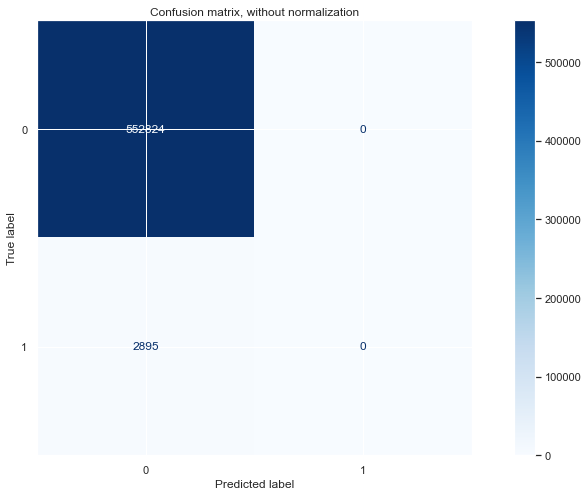

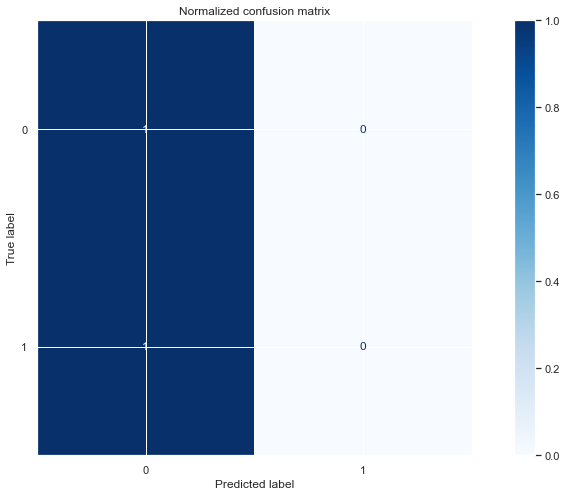

In [25]:
get_confusion_matrix(clf_dummy, X_test_scaled, Y_test)

#### Logistic Regression 

In [58]:
LR = LogisticRegression()
LR.fit(X_train_scaled, Y_train_res)

/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred = LR.predict(X_test_scaled)

In [60]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    552824
           1       0.03      0.74      0.05      2895

    accuracy                           0.86    555719
   macro avg       0.51      0.80      0.49    555719
weighted avg       0.99      0.86      0.92    555719



/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[473630  79194]
 [   765   2130]]
Normalized confusion matrix
[[0.85674645 0.14325355]
 [0.2642487  0.7357513 ]]


/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


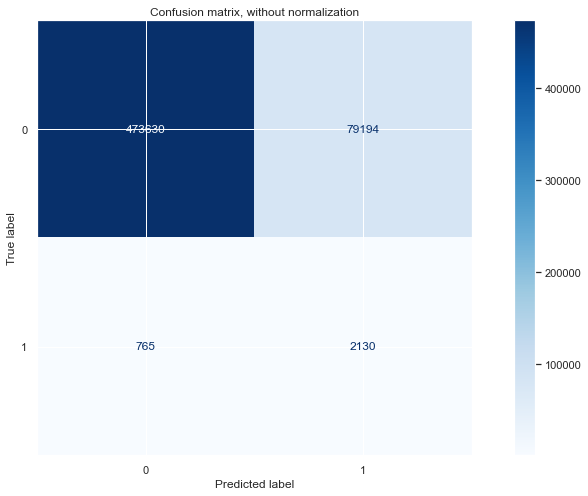

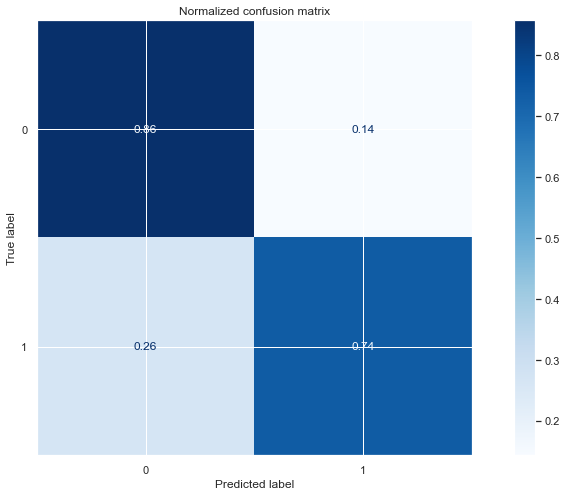

In [28]:
get_confusion_matrix(LR, X_test_scaled, Y_test)

#### GLM

In [31]:
GNB = GaussianNB()
GNB.fit(X_train_scaled, Y_train_res)

GaussianNB()

In [32]:
y_pred = GNB.predict(X_test_scaled)

/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[541581  11243]
 [  1476   1419]]


/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.97966261 0.02033739]
 [0.50984456 0.49015544]]


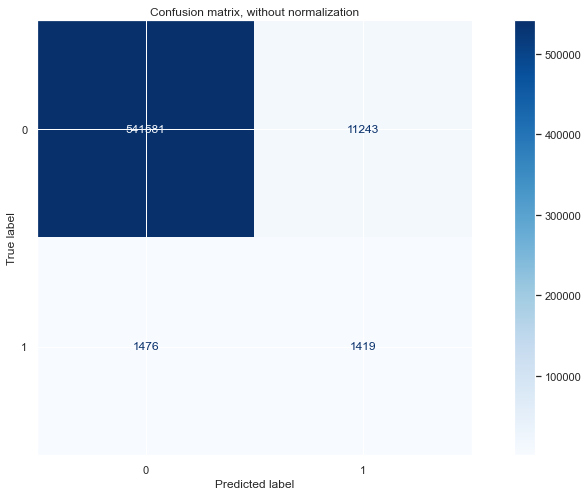

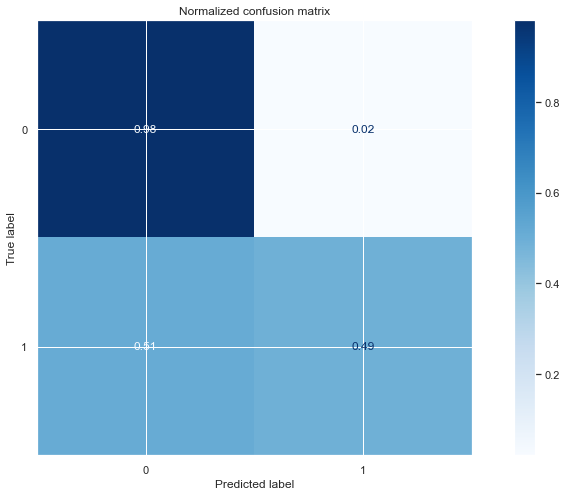

In [33]:
get_confusion_matrix(GNB, X_test_scaled, Y_test)

##### SVM

In [12]:
clf = svm.SVC()
clf.fit(X_train_scaled, Y_train_res)
y_pred = clf.predict(X_test_scaled)
print("model score: %.3f" % clf.score(X_test_scaled, Y_test))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

model score: 0.862
Accuracy: 0.8622955126601753


/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[476931  75893]
 [   632   2263]]


/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.86271761 0.13728239]
 [0.21830743 0.78169257]]


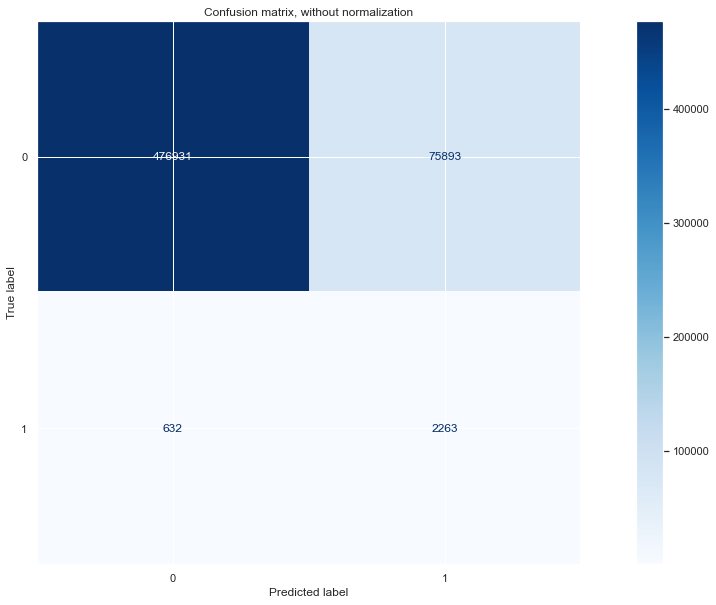

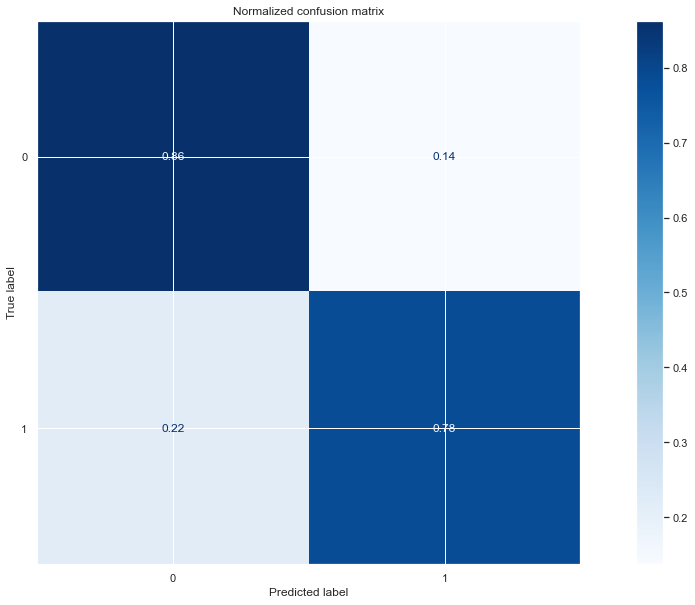

In [13]:
get_confusion_matrix(clf, X_test_scaled, Y_test)

#### Random Forest

In [61]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, Y_train_res)

RandomForestClassifier()

In [62]:
y_pred = rf.predict(X_test_scaled)

In [63]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552824
           1       0.19      0.96      0.31      2895

    accuracy                           0.98    555719
   macro avg       0.59      0.97      0.65    555719
weighted avg       1.00      0.98      0.99    555719



/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[540446  12378]
 [   109   2786]]


/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.97760951 0.02239049]
 [0.03765112 0.96234888]]


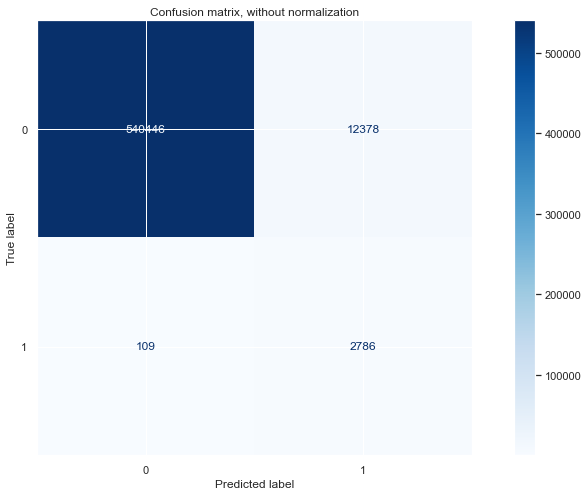

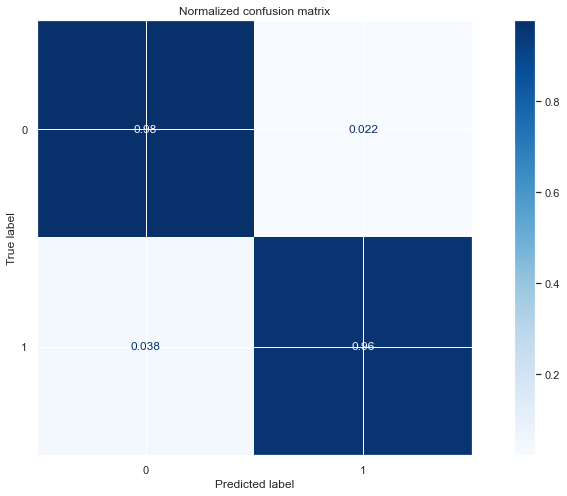

In [41]:
get_confusion_matrix(rf, X_test_scaled, Y_test)

In [42]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552824
           1       0.18      0.96      0.31      2895

    accuracy                           0.98    555719
   macro avg       0.59      0.97      0.65    555719
weighted avg       1.00      0.98      0.99    555719



#### XGBoost

In [75]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train_scaled, Y_train_res)
y_pred = XGB.predict(X_test_scaled)

In [65]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552824
           1       0.19      0.98      0.32      2895

    accuracy                           0.98    555719
   macro avg       0.60      0.98      0.65    555719
weighted avg       1.00      0.98      0.99    555719



/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[540898  11926]
 [    70   2825]]


/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.97842713 0.02157287]
 [0.02417962 0.97582038]]


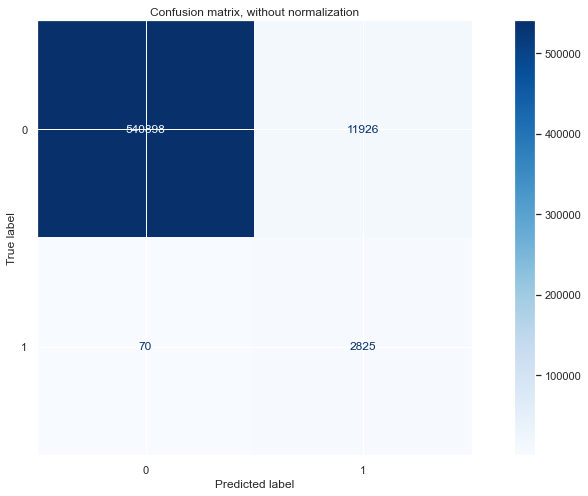

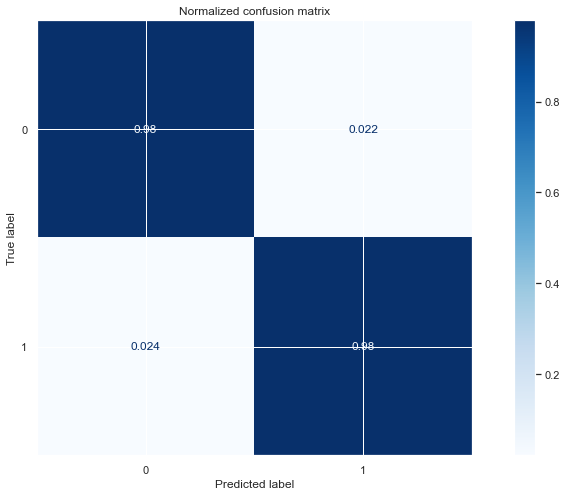

In [47]:
get_confusion_matrix(XGB, X_test_scaled, Y_test)

In [48]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552824
           1       0.19      0.98      0.32      2895

    accuracy                           0.98    555719
   macro avg       0.60      0.98      0.65    555719
weighted avg       1.00      0.98      0.99    555719



In [82]:
train_accuracy, train_precision, test_accuracy, test_precision = calculate_accuracy_precision(XGB, X_train_scaled, X_test_scaled, Y_train_res, Y_test)

print('Train Accuracy: ', train_accuracy)
print('Train Precision: ', train_precision)
print('Test Accuracy: ', test_accuracy)
print('Test Precision: ', test_precision)

Train Accuracy:  1.0
Train Precision:  1.0
Test Accuracy:  0.97841
Test Precision:  0.19151


In [78]:
sensitivity, specificity = calculate_sensitivity_specificity(Y_test, y_pred)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)

Sensitivity:  0.9758203799654577
Specificity:  0.9784271305153177


In [49]:
prob_predictions = XGB.predict_proba(X_test_scaled)
yhat = prob_predictions[:, 1]

In [84]:
f1, f2 = calculate_f1_f2_scores(Y_test, y_pred)
print("F1 Score: ", round(f1, 5))
print("F2 Score: ", round(f2, 5))

F1 Score:  0.32019
F2 Score:  0.53644


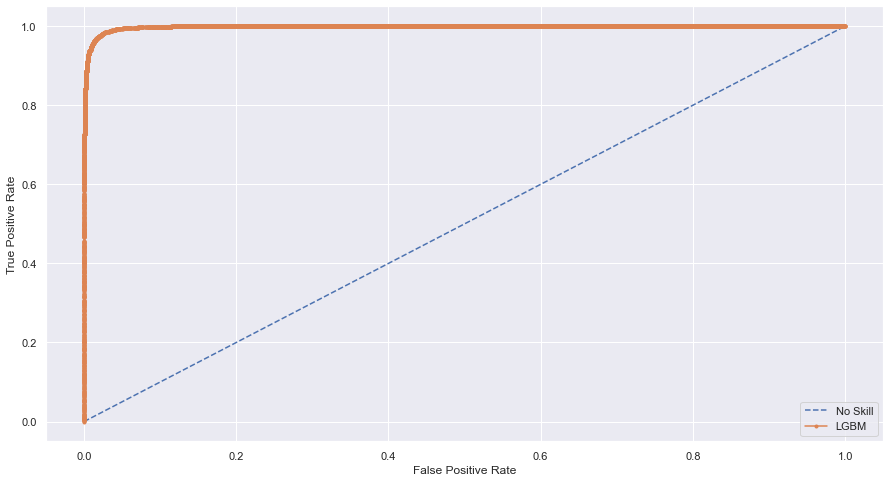

Best Threshold=0.372738, G-Mean=0.979


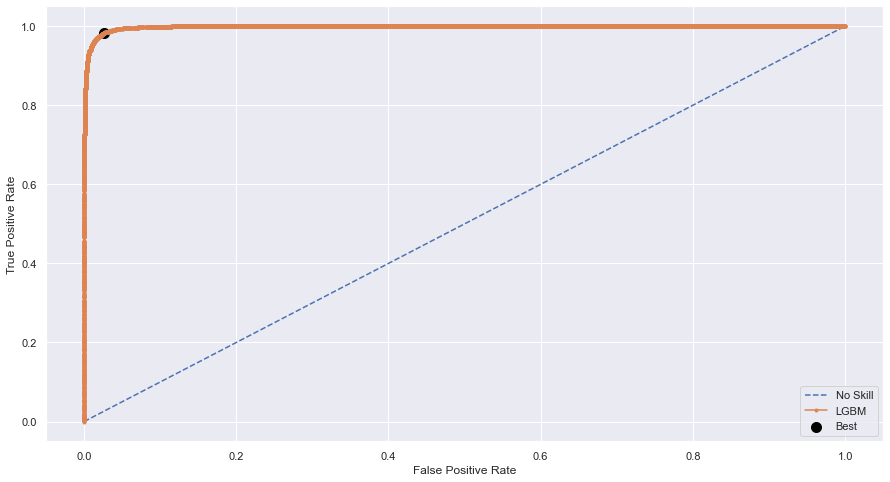

In [50]:
get_roc_curves(Y_test, yhat)

In [51]:
precision, recall, thresholds = precision_recall_curve(Y_test, yhat)

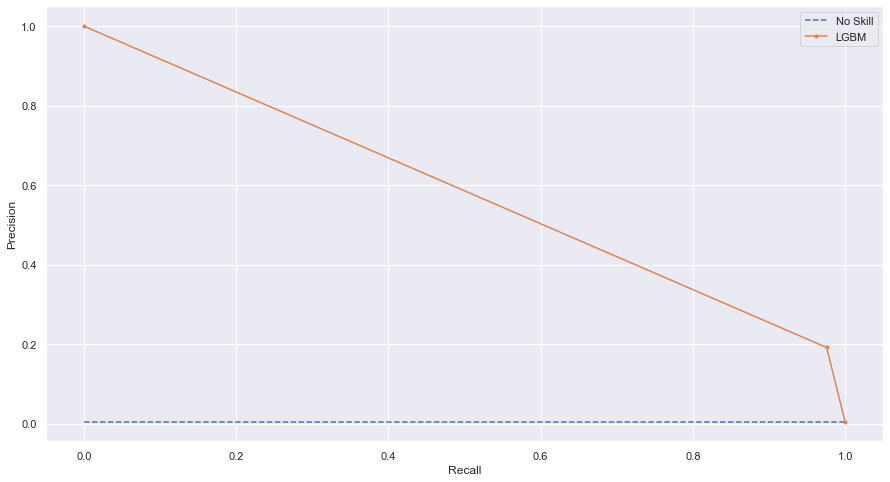

Best Threshold=1.000000, F-Score=0.320


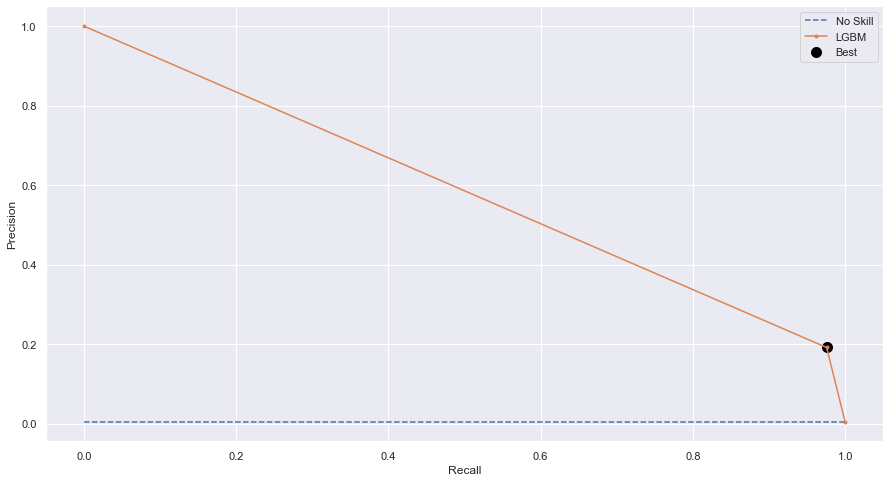

In [53]:
get_precission_recall_curve(Y_test, y_pred)

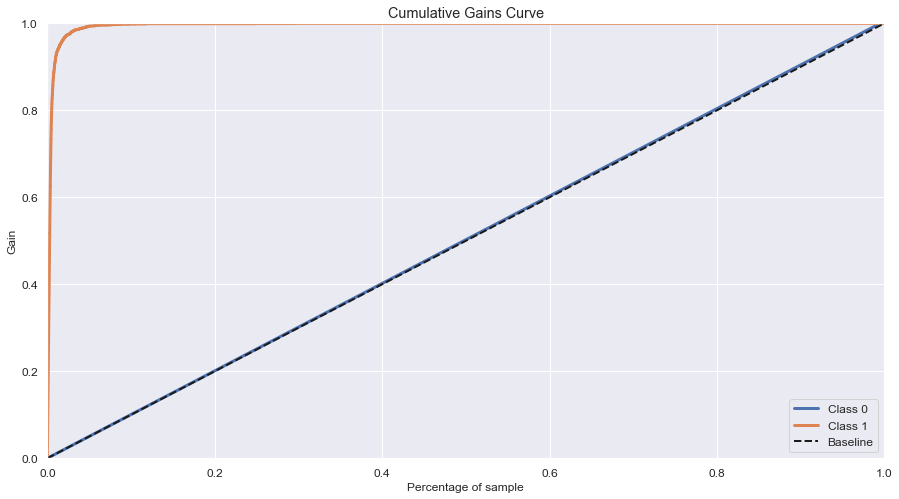

In [55]:
skplt.metrics.plot_cumulative_gain(Y_test, prob_predictions)
plt.show()

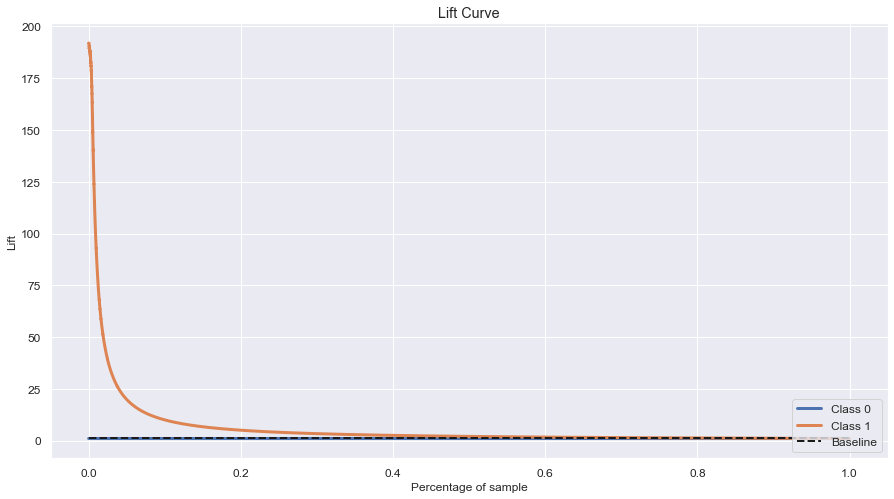

In [56]:
skplt.metrics.plot_lift_curve(Y_test, prob_predictions)
plt.show()

In [57]:
fbeta_score(Y_test, y_pred, beta=beta)

0.5364399377160002

In [69]:
param_grid = {"subsample":[0.5, 0.75, 1], "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12], "min_child_weight":[1,5,15], "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]}

model = xgb.XGBClassifier()
best_XGBoost = RandomizedSearchCV(model,param_grid,cv=3,scoring="f1_macro") #
best_XGBoost.fit(X_train_scaled, Y_train_res)
print(best_XGBoost.best_params_)

{'subsample': 1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [70]:
y_pred_XGBBoost = best_XGBoost.predict(X_test_scaled)

In [71]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552824
           1       0.19      0.98      0.32      2895

    accuracy                           0.98    555719
   macro avg       0.60      0.98      0.65    555719
weighted avg       1.00      0.98      0.99    555719



/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[540081  12743]
 [    70   2825]]


/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.97694926 0.02305074]
 [0.02417962 0.97582038]]


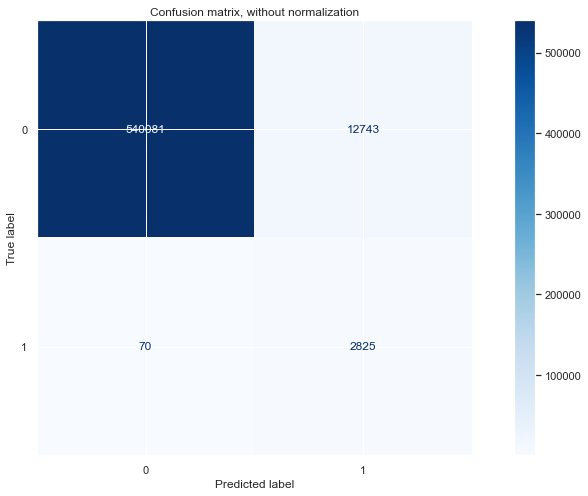

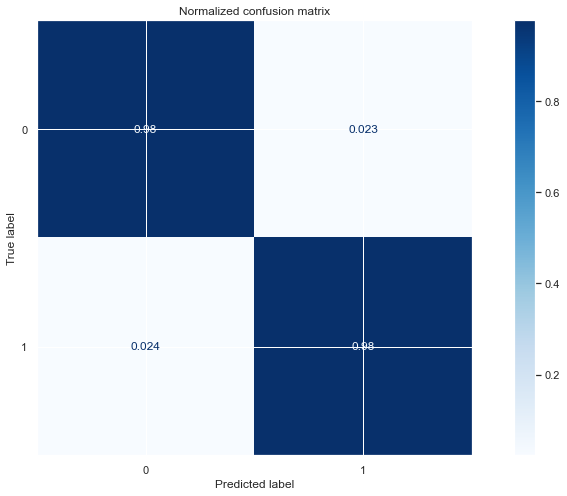

In [73]:
get_confusion_matrix(best_XGBoost, X_test_scaled, Y_test)

#### ADA Boost Clasifier

In [34]:
ADA = AdaBoostClassifier(random_state=seed)
ADA.fit(X_train_scaled, Y_train_res)

AdaBoostClassifier(random_state=123456)

In [36]:
y_pred = ADA.predict(X_test_scaled)

/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[526707  26117]
 [   162   2733]]


/Users/ignaciogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.95275712 0.04724288]
 [0.05595855 0.94404145]]


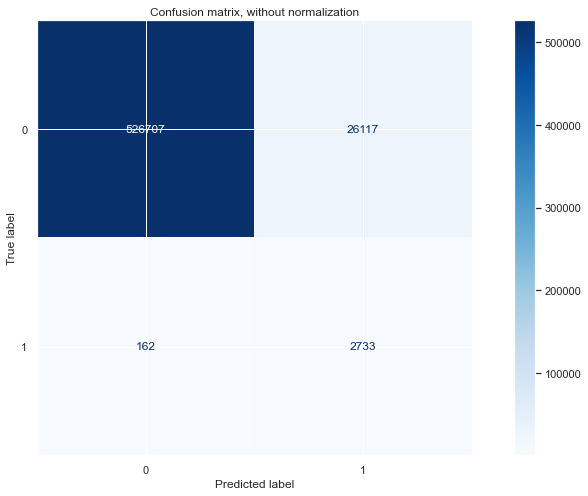

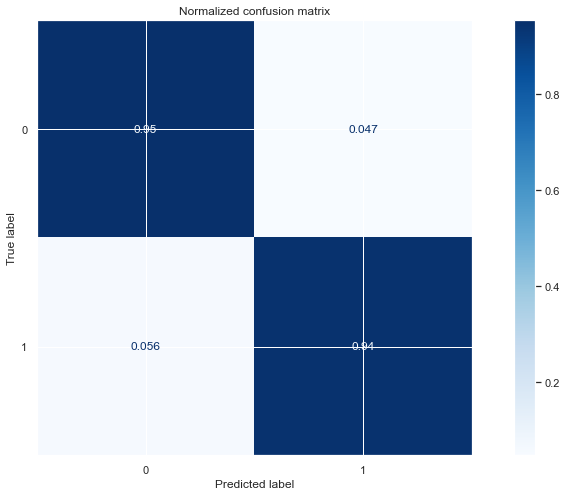

In [38]:
get_confusion_matrix(clf, X_test_scaled, Y_test)

In [37]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    552824
           1       0.09      0.94      0.17      2895

    accuracy                           0.95    555719
   macro avg       0.55      0.95      0.57    555719
weighted avg       0.99      0.95      0.97    555719

